ModuleNotFoundError: No module named 'jupyterthemes'

In [42]:
import pandas as pd
import numpy as np


In [43]:
df=pd.read_csv("train (1).csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [45]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [46]:
columns_to_drop=['PassengerId', 'Name','Ticket', 'Cabin', 'Embarked']

In [47]:
clean_data=df.drop(columns_to_drop,axis=1)

In [48]:
clean_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [49]:
#label encoding of Sex
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
clean_data["Sex"]=le.fit_transform(clean_data["Sex"])

In [50]:
clean_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [51]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.3 KB


In [52]:
#filling up missing age with mean

clean_data=clean_data.fillna(clean_data["Age"].mean())

In [53]:
clean_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [54]:
X=clean_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
Y=clean_data['Survived']

In [55]:
X.shape,Y.shape

((891, 6), (891,))

In [56]:
#define entropy and information gain
def entropy(col):
    counts=np.unique(col,return_counts=True)
    N=float(col.shape[0])
    
    entropy=0.0
    
    for i in counts[1]:
        p=i/N
        entropy+=(-1*p*np.log2(p))
    
    return entropy
        

In [57]:
#refernce for understanding the above loop and unique
col=np.array([1,1,1,1,1,1,0,0,0,0,0,0,0,0,0])
print(np.unique(col,return_counts=True))

(array([0, 1]), array([9, 6], dtype=int64))


In [58]:
def divide_data(x_data,fkey,fval):
    x_right=pd.DataFrame([],columns=x_data.columns)
    x_left=pd.DataFrame([],columns=x_data.columns)
    
    for i in range(x_data.shape[0]):
        value=x_data[fkey].loc[i]
        
        if value>fval: 
            x_right=x_right.append(x_data.loc[i])
        else:
            x_left=x_left.append(x_data.loc[i])
            
    return x_right,x_left


In [59]:
def Infgain(x_data,fkey,fval):
    left,right=divide_data(x_data,fkey,fval)
    
    l=float(left.shape[0])/x_data.shape[0]
    r=float(right.shape[0])/x_data.shape[0]
    
    if left.shape[0]==0 or right.shape[0]==0:
        return -100000000 #min Infgain
    
    i_gain=entropy(x_data.Survived)-(l*entropy(left.Survived)+r*entropy(right.Survived))
    
    return i_gain
        
    

In [60]:
for ix in X.columns:
    print(ix)
    print(Infgain(clean_data,ix,clean_data[ix].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.001158644038169343
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


In [ ]:
class DecisionTree:
    
    #constructor
    def __init__(self,depth=0,max_depth=5):
        self.left=None
        self.right=None
        self.fkey=None
        self.fval=None
        self.depth=depth
        self.max_depth=max_depth
        self.target=None
        
    def train(self,Xtrain):
        features=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
        info_gains=[]
        
        for ix in features:
            ing=Infgain(clean_data,ix,clean_data[ix].mean())
            info_gains.append(ing)
            
        self.fkey=features[np.argmax(info_gains)]
        self.fval=Xtrain['fkey'].mean()
        data_left,data_right=divide_data(Xtrain,self.fkey,self.fval)
        data_left=data_left.reset(drop=True)
        data_right=data_right.reset(drop=True)
        print("Making Tree features is", self.key)
        
        # Truly a left node
        if data_left.shape[0]==0 or data_right.shape[0]==0:
            if Xtrain.Survived>= 0.5:
                self.target== 'Survived'
            else:
                self.target== 'Not Survived'
            return
        
        #stop Early
        if(self.depth>=self.max_depth):
            if Xtrain.Survived>= 0.5:
                self.target== 'Survived'
            else:
                self.target== 'Not Survived'
            return
        
        #Set the target at every node
        if Xtrain.Survived>= 0.5:
            self.target== 'Survived'
        else:
            self.target== 'Not Survived'
        return
            
        #recursive Case
        self.left=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right=DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
                
            
        

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
dtc=DecisionTreeClassifier(criterion='entropy')

In [106]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
print(X_train.shape, y_train.shape, x_test.shape)

(712, 6) (712,) (179, 6)


In [119]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [120]:
pred=dtc.predict(x_test)
dtc.score(x_test,y_test)

0.7988826815642458

In [121]:
dtc.score(X_train,y_train)

0.8342696629213483

In [91]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [95]:
dot_data=StringIO()
export_graphviz(dtc,out_file=dot_data,filled=True,rounded=True)

In [103]:
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

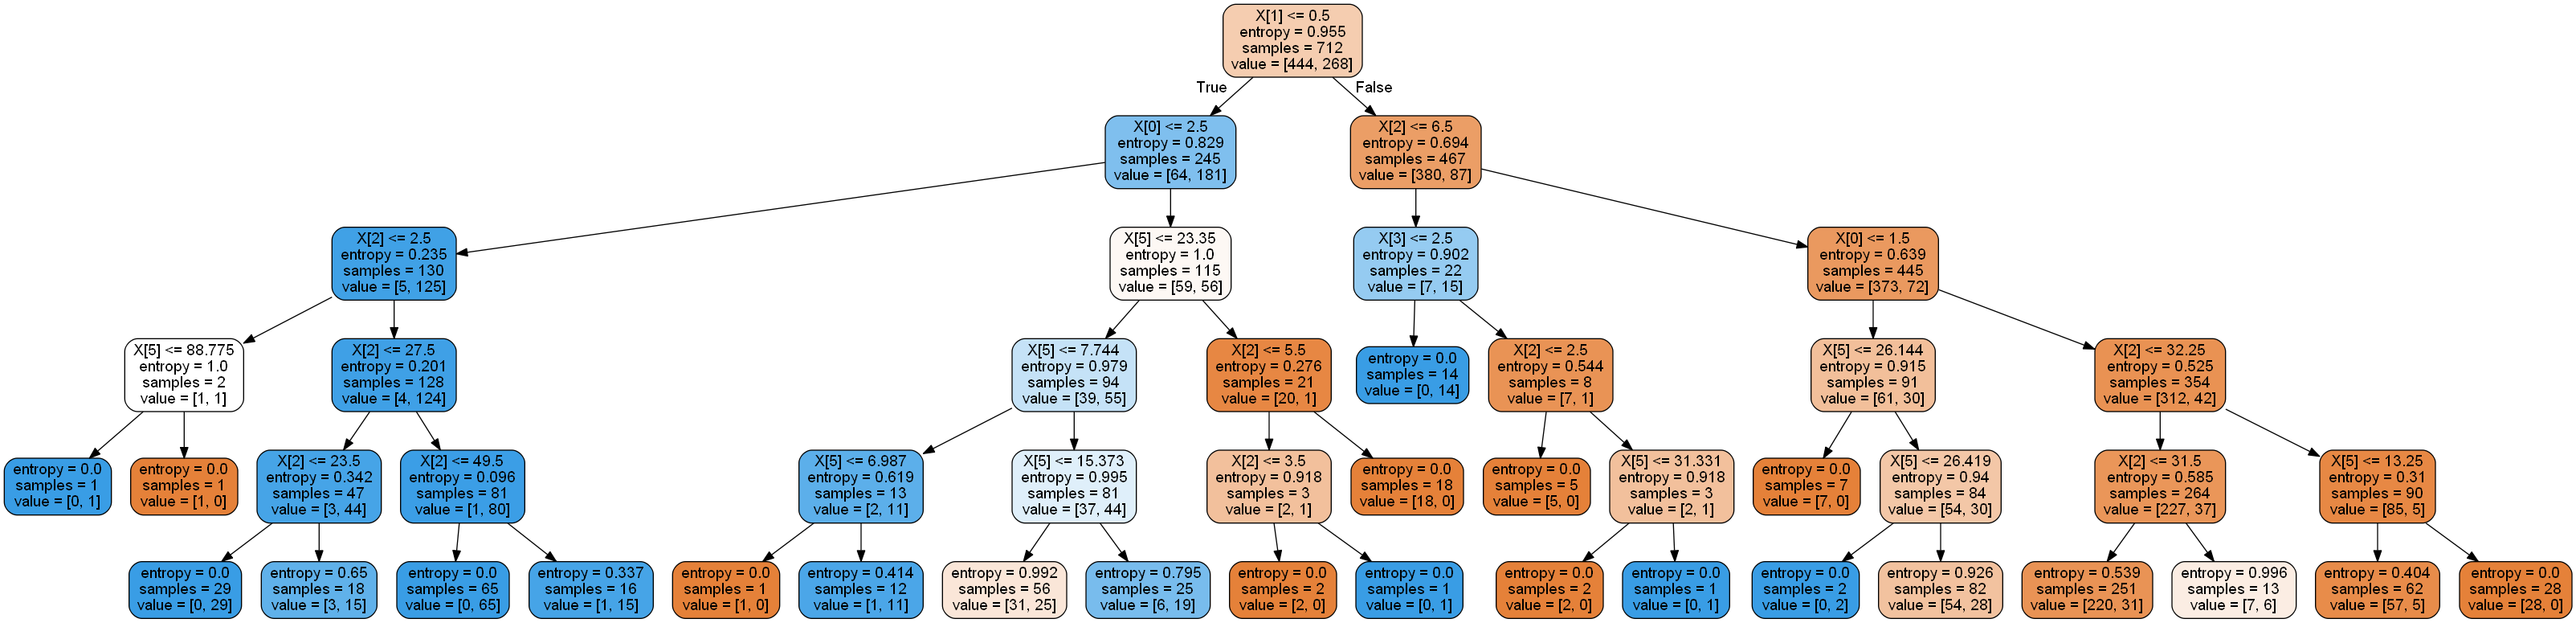

In [104]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
rf=RandomForestClassifier(n_estimators=10,
    criterion='entropy',
    max_depth=5,)

In [151]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [152]:
rf.score(X_train,y_train)

0.8623595505617978

In [153]:
rf.score(x_test,y_test)

0.8044692737430168

In [157]:
#cross validation random forest
from sklearn.model_selection import cross_val_score
acc=cross_val_score(RandomForestClassifier(n_estimators=20,criterion='entropy',max_depth=5),X,Y,cv=10)

In [158]:
acc.mean()

0.8204829190784247

In [160]:
acc_list=[]
for i in range(1,50):
    acc=cross_val_score(RandomForestClassifier(n_estimators=i,criterion='entropy',max_depth=5),X,Y,cv=10).mean()
    acc_list.append(acc)

In [162]:
np.argmax(acc_list)

12

In [164]:
acc_list[12]

0.8305705935762114

In [165]:
import matplotlib.pyplot as plt

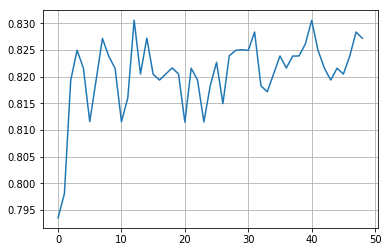

In [167]:
plt.plot(acc_list)
plt.grid()